In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
# Чтение базы
massiv_fx = pd.read_csv('massiv.csv')

In [145]:
massiv_fx

,Time,Open,Close,Low,High,RSI,MFI,MACD,Stochastik
0,2145,111.843,111.828,111.797,111.871,43.65,44.199,0.1425,13.57
1,2200,111.826,111.836,111.799,111.879,43.74,43.872,0.1443,13.60
2,2215,111.835,111.950,111.814,111.971,45.00,44.942,0.1443,13.73
3,2230,111.951,112.005,111.928,112.033,45.59,45.927,0.1428,13.94
4,2245,112.005,112.047,111.983,112.078,46.04,47.031,0.1405,14.18
...,...,...,...,...,...,...,...,...,...
99894,1245,118.115,118.100,118.088,118.167,44.43,49.984,0.0144,67.87
99895,1300,118.099,118.138,118.094,118.149,45.14,49.956,0.0205,67.50
99896,1315,118.137,118.134,118.112,118.191,45.08,50.000,0.0259,67.06
99897,1330,118.135,118.216,118.122,118.224,46.58,49.891,0.0300,66.81


In [146]:
massiv_fx_len = massiv_fx.shape[0] // 9
massiv_blok = 100 # Формируем матрицы для анализа 96*4*24

In [147]:
# Делим на базы
bd_train = massiv_fx[:massiv_fx_len * 6].reset_index(drop=True)
bd_test = massiv_fx[massiv_fx_len * 6 + massiv_blok * 2:massiv_fx_len * 8].reset_index(drop=True)
bd_val = massiv_fx[massiv_fx_len * 8 + massiv_blok * 2:].reset_index(drop=True)

In [148]:
bd_train
bd_test
bd_val

,Time,Open,Close,Low,High,RSI,MFI,MACD,Stochastik
0,1315,113.979,113.932,113.901,113.986,43.42,45.219,0.1042,16.14
1,1330,113.929,113.905,113.899,113.951,43.08,45.304,0.1053,16.19
2,1345,113.906,114.003,113.900,114.040,44.66,46.616,0.1050,16.34
3,1400,114.001,113.974,113.960,114.046,44.29,47.985,0.1045,16.58
4,1415,113.973,113.979,113.944,114.021,44.37,47.921,0.1042,16.86
...,...,...,...,...,...,...,...,...,...
10902,1245,118.115,118.100,118.088,118.167,44.43,49.984,0.0144,67.87
10903,1300,118.099,118.138,118.094,118.149,45.14,49.956,0.0205,67.50
10904,1315,118.137,118.134,118.112,118.191,45.08,50.000,0.0259,67.06
10905,1330,118.135,118.216,118.122,118.224,46.58,49.891,0.0300,66.81


Стандартизация

In [149]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [151]:
ss = StandardScaler()
bd_X_train_sc = ss.fit_transform(np.array(bd_train))
bd_X_test_sc = ss.transform(np.array(bd_test))
bd_X_val_sc = ss.transform(np.array(bd_val))
#bd_Y_train_sc = ss.fit_transform(bd_train['Close'])
#bd_Y_test_sc = ss.fit_transform(bd_test['Close'])
#bd_Y_val_sc = ss.fit_transform(bd_val['Close'])

In [152]:
# Создаем матрицы для обучения
# Используем 2й стоблец, Close для формирования Y_* массивов
X_train = []
Y_train = []
for col in range(len(bd_train)-massiv_blok):
    X_train.append(bd_X_train_sc[col:col+massiv_blok])
    Y_train.append(bd_train['Close'][col+massiv_blok])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [153]:
# Создаем матрицы для тестирования
X_test = []
Y_test = []
for col in range(len(bd_test)-massiv_blok-1):
    X_test.append(bd_X_test_sc[col:col+massiv_blok])
    Y_test.append(bd_test['Close'][col+massiv_blok])
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [154]:
# Создаем матрицы для валидации
X_val = []
Y_val = []
for col in range(len(bd_val)-massiv_blok-1):
    X_val.append(bd_X_val_sc[col:col+massiv_blok])
    Y_val.append(bd_val['Close'][col+massiv_blok])
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [155]:
X_val[:5]

array([[[ 0.20255805,  0.7529144 ,  0.73406263, ..., -0.83151867,
          1.16387232, -1.61532633],
        [ 0.22428776,  0.73310443,  0.72336585, ..., -0.81821307,
          1.17627952, -1.61302714],
        [ 0.24601748,  0.72399185,  0.76219119, ..., -0.61283723,
          1.17289574, -1.60612956],
        ...,
        [ 0.24601748,  0.78857234,  0.806563  , ...,  0.51469493,
         -0.11406974,  0.02583839],
        [ 0.32569312,  0.80719371,  0.81052477, ...,  0.49450173,
         -0.1039184 ,  0.03365565],
        [ 0.34742284,  0.81036331,  0.79784711, ...,  0.53880155,
         -0.08699948,  0.0400934 ]],

       [[ 0.22428776,  0.73310443,  0.72336585, ..., -0.81821307,
          1.17627952, -1.61302714],
        [ 0.24601748,  0.72399185,  0.76219119, ..., -0.61283723,
          1.17289574, -1.60612956],
        [ 0.32569312,  0.76163079,  0.75070206, ..., -0.39853881,
          1.1672561 , -1.59509343],
        ...,
        [ 0.32569312,  0.80719371,  0.81052477, ...,  

In [156]:
Y_val[:5]

array([114.124, 114.148, 114.079, 114.021, 113.977])

In [157]:
X_train.shape

(66494, 100, 9)

In [158]:
Y_train.shape

(66494,)

Нейронка

In [159]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, \
                                    LSTM, GRU, Concatenate, Reshape, BatchNormalization, ReLU, \
                                    Average, Multiply, Add
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras import layers

In [160]:
import tensorflow as tf

In [161]:
'''
activ = 'selu'
activ_main = 'tanh'

a = Input(shape=(24,24,))

z = Conv1D(24, 12)(a)
z = Conv1D(24, 12)(z)
z = LSTM(24)(z)
z = Reshape((6,4))(z)
z = GRU(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
z = Activation(activ)(z)

y = Conv1D(12, 8)(a)
y = Conv1D(12, 8)(y)
y = LSTM(12)(y)
y = Reshape((3,4))(y)
y = GRU(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
y = Activation(activ)(y)

w = Conv1D(6, 3)(a)
w = Conv1D(6, 3)(w)
w = LSTM(4)(w)
w = Reshape((2,2))(w)
w = GRU(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
w = Activation(activ)(w)

x = Concatenate()([z, y, w])

x = Dense(1024)(x)
x = Dense(128)(x)
x = Activation(activ)(x)

x = Flatten()(x)

x = Dropout(0.3)(x)
x = Dense(24)(x)
x = Dense(24)(x)

x = Activation(activ_main)(x)
model = Model(inputs=a, outputs=x)
'''

"\nactiv = 'selu'\nactiv_main = 'tanh'\n\na = Input(shape=(24,24,))\n\nz = Conv1D(24, 12)(a)\nz = Conv1D(24, 12)(z)\nz = LSTM(24)(z)\nz = Reshape((6,4))(z)\nz = GRU(24)(z)\n#z = Reshape((6,4))(z)\n#z = LSTM(24)(z)\n#z = Reshape((6,4))(z)\n#z = LSTM(24)(z)\nz = Activation(activ)(z)\n\ny = Conv1D(12, 8)(a)\ny = Conv1D(12, 8)(y)\ny = LSTM(12)(y)\ny = Reshape((3,4))(y)\ny = GRU(12)(y)\n#y = Reshape((3,4))(y)\n#y = LSTM(12)(y)\n#y = Reshape((3,4))(y)\n#y = LSTM(12)(y)\ny = Activation(activ)(y)\n\nw = Conv1D(6, 3)(a)\nw = Conv1D(6, 3)(w)\nw = LSTM(4)(w)\nw = Reshape((2,2))(w)\nw = GRU(4)(w)\n#w = Reshape((2,2))(w)\n#w = LSTM(4)(w)\n#w = Reshape((2,2))(w)\n#w = LSTM(4)(w)\nw = Activation(activ)(w)\n\nx = Concatenate()([z, y, w])\n\nx = Dense(1024)(x)\nx = Dense(128)(x)\nx = Activation(activ)(x)\n\nx = Flatten()(x)\n\nx = Dropout(0.3)(x)\nx = Dense(24)(x)\nx = Dense(24)(x)\n\nx = Activation(activ_main)(x)\nmodel = Model(inputs=a, outputs=x)\n"

In [162]:
activ = 'linear' # tanh
activ_main = 'linear' # sigmoid

a = Input(shape=(massiv_blok,9,))

#z = Conv1D(massiv_blok, 8, padding='same')(a) #1
#z = Conv1D(massiv_blok, 48, padding='same')(z) #1
##z = LSTM(massiv_blok//2)(a)
##z = Flatten()(z)
#z = Reshape((massiv_blok//2//4,2))(z)
#z = GRU(48, return_sequences=True)(a)
#z = GRU(24, return_sequences=True)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Flatten()(a)
#z = Dense(256)(z)
#z = Activation(activ)(z) #1

'''
y = Conv1D(massiv_blok//2, 16, padding='same')(a)
##y = Flatten()(y)
#y = Conv1D(massiv_blok, 8, padding='same')(y)
#y = LSTM(blok_old//4)(a)
#y = Reshape((3,4))(y)
#1 y = GRU(192*2)(a) #1
#1 y = Reshape((96,4))(y) #1
#y = LSTM(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
##y = Flatten()(a)
##y = Dense(1024)(y)
y = Activation(activ)(y) #1

#k = Flatten()(a)
#k = Dense(768)(k)
#k = Activation(activ)(k) #2

#l = Flatten()(a)
#l = Dense(128)(l)
#l = Dense(128)(l)
#l = Activation(activ)(l) #2

w = Conv1D(massiv_blok//4, 32, padding='same', strides=1, kernel_initializer="glorot_uniform")(a) #1
#w = Conv1D(massiv_blok//8, 48*16, padding='same', strides=1, kernel_initializer="glorot_uniform")(w) #1
##w = LSTM(massiv_blok//8)(a)
##w = Flatten()(w)
#w = Reshape((massiv_blok//8//2,2))(w)
#w = GRU(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Flatten()(w)
#w = Dense(512)(w)
w = Activation(activ)(w) #1
'''
l = layers.LSTM(96, return_sequences=True)(a)
l = layers.LSTM(24, return_sequences=True)(l)
l = layers.LSTM(48, return_sequences=True)(l)

n = layers.LSTM(64, return_sequences=True)(a)
n = layers.LSTM(16, return_sequences=True)(n)
n = layers.LSTM(32, return_sequences=True)(n)

#ll = layers.LSTM(6, return_sequences=True)(a)
ll = GRU(48, return_sequences=True)(l)
ll = BatchNormalization()(ll)
ll = Dropout(0.3)(ll)
ll = Activation(activ)(ll)

#nn = layers.LSTM(8, return_sequences=True)(a)
nn = GRU(48, return_sequences=True)(n)
nn = BatchNormalization()(nn)
nn = Dropout(0.3)(nn)
nn = Activation(activ)(nn)

#z = BatchNormalization()(z) #1
#z = Dropout(0.3)(z)
#y = BatchNormalization()(y)
#y = Dropout(0.3)(y) #1
#w = BatchNormalization()(w) #1
#w = Dropout(0.3)(w) #1

x = Concatenate()([l, ll, n, nn])
#x = Concatenate()([z, y, w, k, l]) #1
#x = Concatenate()([z, y, w, n]) #1
#x = Flatten()(x)

#x = Dense(144)(x)
#x = Activation(activ)(x)
#x = Dense(48)(x)
#x = Activation(activ)(x)

x = Flatten()(x)

#x = Dropout(0.3)(x)
#x = Dense(24)(x)
x = Dense(1)(x)

x = Activation(activ_main)(x)
model = Model(inputs=a, outputs=x)

In [163]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 9)]     0           []                               
                                                                                                  
 lstm_6 (LSTM)                  (None, 100, 96)      40704       ['input_2[0][0]']                
                                                                                                  
 lstm_9 (LSTM)                  (None, 100, 64)      18944       ['input_2[0][0]']                
                                                                                                  
 lstm_7 (LSTM)                  (None, 100, 24)      11616       ['lstm_6[0][0]']                 
                                                                                            

In [164]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [165]:
model.compile(loss=keras.losses.mape, #BinaryCrossentropy / Hinde /
    optimizer=keras.optimizers.Adadelta(), # Ftrl / SGD /
    metrics=[keras.metrics.mean_squared_error]) #BinaryAccuracy / BinAcc /

In [166]:
# Параметры для функции callback
# Прерывание обучение при не изменной ошибке
stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,
                                     patience=25, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
# Измененение шага для оптимизатора при стагнации ошибки
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4,
                                              patience=17, verbose=1,
                                              mode='auto', cooldown=1, min_lr=1e-15)
# Сохранение весов, лучшей модели
weights_file = 'weights.h5'
save_goods = keras.callbacks.ModelCheckpoint(weights_file,
                                             monitor='val_mean_squared_error',
                                             mode='auto',
                                             verbose=1,
                                             save_best_only=True)
# Коллбэки
#pltGraf = LambdaCallback(on_epoch_end=my_graf)  # Конец эпохи
#time_start = LambdaCallback(on_epoch_begin=my_time_start)  # Начало эпохи
#time_stop = LambdaCallback(on_epoch_end=my_time)  # Начало эпохи
#init = LambdaCallback(on_train_begin=my_init)  # Начало обучения, инициализация параметров


In [167]:
history = model.fit(X_train,Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=300,
                    epochs=390,
                    verbose=1,
                    callbacks=[stop, save_goods, reduce_lr])

Epoch 1/390
222/222 [==============================] - ETA: 0s - loss: 99.9755 - mean_squared_error: 12576.0596
Epoch 1: val_mean_squared_error improved from inf to 12848.75586, saving model to weights.h5
222/222 [==============================] - 152s 238ms/step - loss: 99.9755 - mean_squared_error: 12576.0596 - val_loss: 100.1009 - val_mean_squared_error: 12848.7559 - lr: 0.0010
Epoch 2/390
222/222 [==============================] - ETA: 0s - loss: 99.8300 - mean_squared_error: 12543.5811
Epoch 2: val_mean_squared_error did not improve from 12848.75586
222/222 [==============================] - 40s 179ms/step - loss: 99.8300 - mean_squared_error: 12543.5811 - val_loss: 100.2415 - val_mean_squared_error: 12888.5498 - lr: 0.0010
Epoch 3/390
222/222 [==============================] - ETA: 0s - loss: 99.5920 - mean_squared_error: 12488.2334
Epoch 3: val_mean_squared_error did not improve from 12848.75586
222/222 [==============================] - 45s 204ms/step - loss: 99.5920 - mean_squ

In [168]:
model.save('model_fx.h5')

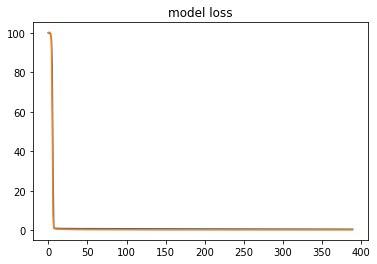

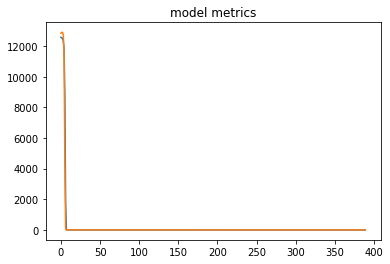

In [169]:
metok = len(list(history.history.keys()))//2

plt.plot(history.history[list(history.history.keys())[0]])
plt.plot(history.history[list(history.history.keys())[metok]])
plt.title('model loss')
plt.show()
for i in range(metok-1):
  plt.plot(history.history[list(history.history.keys())[i+1]])
  plt.plot(history.history[list(history.history.keys())[i+1+metok]])
  plt.title('model metrics')
  plt.show()

In [170]:
from keras.models import load_model
model = load_model('model_fx.h5')

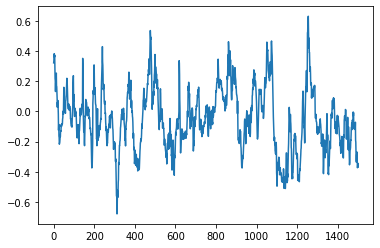

In [179]:
# Сравниваем предикт и базу Val
ttt = 1700
vol = 1500
val_predict = model.predict(X_val[ttt:ttt+vol])
val_original = Y_val[ttt:ttt+vol]
plt.plot(val_predict[:,0] - val_original)

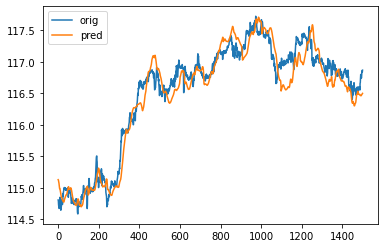

In [180]:
plt.plot(val_original, label='orig')
plt.plot(val_predict, label='pred')
plt.legend()

In [181]:
val_predict

array([[115.12725 ],
       [115.12343 ],
       [115.10686 ],
       ...,
       [116.48777 ],
       [116.494385],
       [116.49767 ]], dtype=float32)

In [182]:
val_original

array([114.805, 114.788, 114.728, ..., 116.854, 116.838, 116.866])